In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path
folder = Path("./070")

def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

def print_outliers_stat(df):
    for column in df:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            outliers = identify_outliers(df[column])  # Assuming this is a function you've defined elsewhere
            print(f'{column}: {len(outliers)} => {(len(outliers) * 100) / len(df[column]):.2f}%')

- (A-4b) Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Formulované hypotézy overte vhodne zvolenými štatistickými testami.
Príklad formulovania:
android.defcontainer má v priemere vyššiu váhu v stave malware-related-activity ako v normálnom stave


$H_0$: Android.defcontainer má v priemere vyššiu váhu v stave malware-related-activity, ako v normálnom stave

$H_A$: Android.defcontainer má v priemere rovnakú/nižšiu váhu v stave malware-related-activity, ako v normálnom stave

### Nami navrhnuta prva hypoteza
- Null hypotéza (H0): Data pre atribut c.katana z connections.csv nie je spojené s vyššou pravdepodobnosťou hodnoty mwra = 1.
- Alternatívna hypotéza (H1): Vyššie používanie aplikácie c.katana (teda vyssie data tohto atributu) zvyšuje pravdepodobnosť, že zariadenie bude mať hodnotu mwra = 1.

In [265]:
# To test this hypothesis we will divide the data to two groups, one where mwra = 0 and the other mwra = 1
# we will then look at the two groups visually in graphs and then test is using t-test or mann-whitney u test
# depending on which we will be able to use on the data

In [266]:
data1 = pd.read_csv(folder / "connections.csv", delimiter="\t", parse_dates=['ts'])

#beacuse in section 1 and 2 we found out there are not any missing values for c.katana 
# we dont have to worry about them here, we will only clip the outliers

c_katana_mwra_1 = data1.loc[data1['mwra'] == 1, 'c.katana']
c_katana_mwra_1.info()
c_katana_mwra_1.describe()

<class 'pandas.core.series.Series'>
Index: 9449 entries, 0 to 15067
Series name: c.katana
Non-Null Count  Dtype  
--------------  -----  
9449 non-null   float64
dtypes: float64(1)
memory usage: 147.6 KB


count    9449.000000
mean       14.049338
std         2.209879
min         5.545620
25%        12.615170
50%        14.085260
75%        15.511960
max        22.669430
Name: c.katana, dtype: float64

<Axes: xlabel='c.katana', ylabel='Count'>

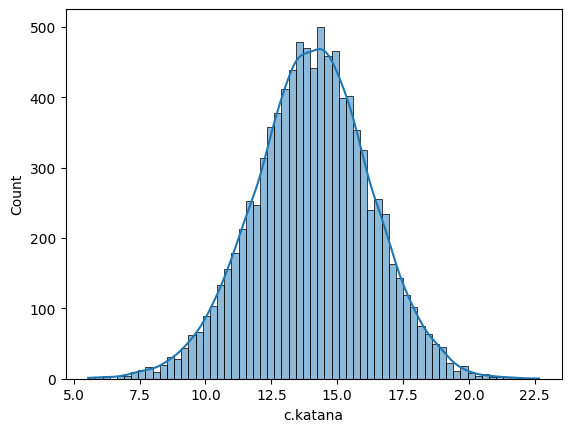

In [267]:
sns.histplot(data=c_katana_mwra_1, kde=True)

<Axes: ylabel='c.katana'>

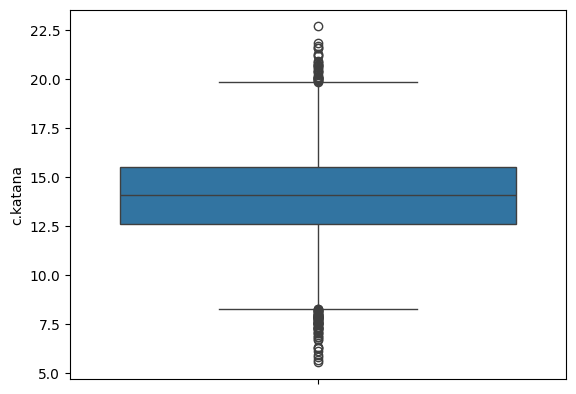

In [268]:
sns.boxplot(data=c_katana_mwra_1)

In [269]:
# because the histogram looks like normal distribution we will not clip the outliers

In [270]:
c_katana_mwra_0 = data1.loc[data1['mwra'] == 0, 'c.katana']
c_katana_mwra_0.info()
c_katana_mwra_0.describe()

<class 'pandas.core.series.Series'>
Index: 5619 entries, 1 to 15066
Series name: c.katana
Non-Null Count  Dtype  
--------------  -----  
5619 non-null   float64
dtypes: float64(1)
memory usage: 87.8 KB


count    5619.000000
mean       11.056874
std         2.346330
min         3.670310
25%         9.467790
50%        10.926300
75%        12.501350
max        20.482330
Name: c.katana, dtype: float64

<Axes: xlabel='c.katana', ylabel='Count'>

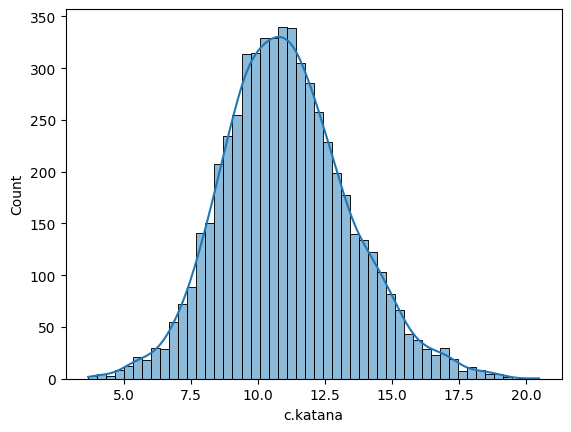

In [271]:
sns.histplot(data=c_katana_mwra_0, kde=True)

<Axes: ylabel='c.katana'>

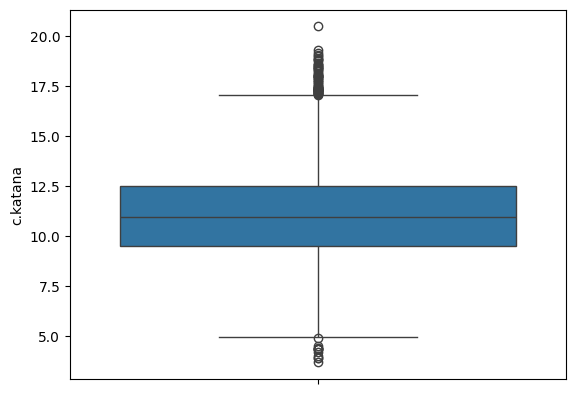

In [272]:
sns.boxplot(data=c_katana_mwra_0)

In [273]:
print(len(identify_outliers(c_katana_mwra_0))/len(c_katana_mwra_0)*100)

c_katana_mwra_0 = c_katana_mwra_0.drop(identify_outliers(c_katana_mwra_0).index)


1.3169603132229935


<Axes: xlabel='c.katana', ylabel='Count'>

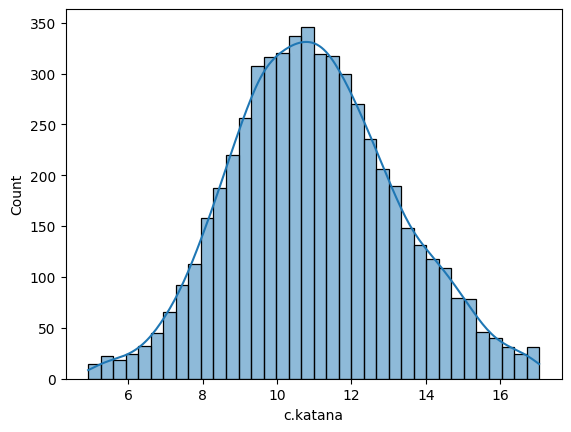

In [274]:
sns.histplot(data=c_katana_mwra_0, kde=True)

In [275]:
# clipping the outliers helps the sample to look like more normally distributed

<Axes: ylabel='c.katana'>

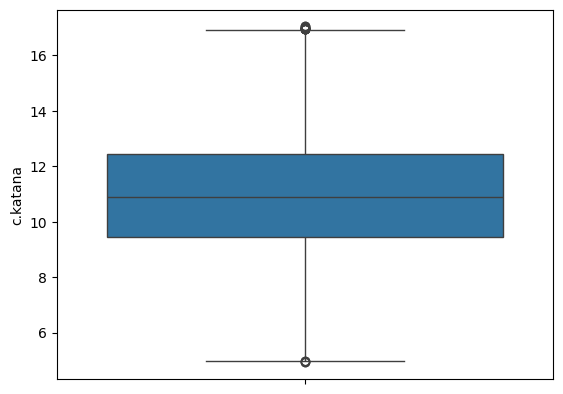

In [276]:
sns.boxplot(c_katana_mwra_0)

In [277]:
# we will check for normal distribution of both samples to know if we can use t-test

((array([-3.79657674, -3.57064108, -3.4465645 , ...,  3.4465645 ,
          3.57064108,  3.79657674]),
  array([ 5.54562,  5.67593,  5.81913, ..., 21.66227, 21.80238, 22.66943])),
 (np.float64(2.2096133980456645),
  np.float64(14.049338400888987),
  np.float64(0.9995564315994329)))

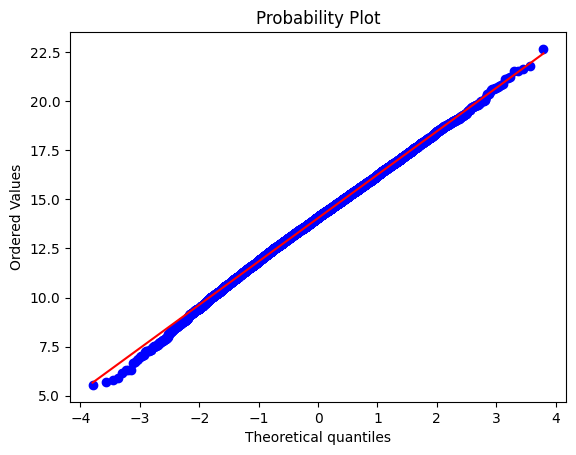

In [278]:
stats.probplot(c_katana_mwra_1, dist="norm", plot=plt)

In [279]:
stats.kstest(c_katana_mwra_1, 'norm')

KstestResult(statistic=np.float64(0.9999999853542819), pvalue=np.float64(0.0), statistic_location=np.float64(5.54562), statistic_sign=np.int8(-1))

In [280]:
# the test suggests that p_value < 0.05, that means we reject H0 => data is not normally distributed

((array([-3.66226774, -3.42855075, -3.29981825, ...,  3.29981825,
          3.42855075,  3.66226774]),
  array([ 4.9237 ,  4.95246,  4.96903, ..., 17.02778, 17.04132, 17.04515])),
 (np.float64(2.2203681392350902),
  np.float64(10.994977532912534),
  np.float64(0.9982214756355637)))

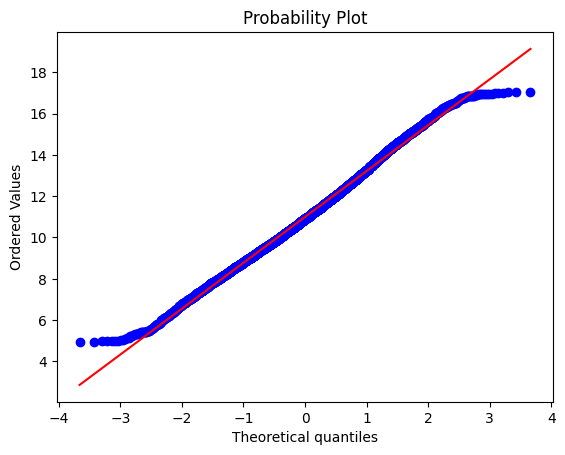

In [281]:
stats.probplot(c_katana_mwra_0, dist="norm", plot=plt)

In [282]:
# we will use Kolmogorov-Smirnov Test because our sample size > 2000 to use shapiro
stats.kstest(c_katana_mwra_0, 'norm')

KstestResult(statistic=np.float64(0.999999575385018), pvalue=np.float64(0.0), statistic_location=np.float64(4.9237), statistic_sign=np.int8(-1))

In [283]:
# the test suggests that p_value < 0.05, that means we reject H0 => data is not normally distributed

In [284]:
# Both samples are not normally distributed so we will use non parametric t-test
# Mann-Whitney U test

stats.mannwhitneyu(c_katana_mwra_1, c_katana_mwra_0)

MannwhitneyuResult(statistic=np.float64(43727592.0), pvalue=np.float64(0.0))

In [285]:
# the test suggests that p_value < 0.05, that means we reject H0 => c.katana from group where 
# mwra is 1 is from different distribution than c.katana from group where mwra is 0

### Nami navrhnuta druha hypoteza
- Null hypotéza (H0): Data pre atribut c.android.gm z processes.csv nie je spojené s vyššou pravdepodobnosťou hodnoty mwra = 1.
- Alternatívna hypotéza (H1): Nizsie používanie aplikácie c.android.gm (teda nizsie data tohto atributu) zvyšuje pravdepodobnosť, že zariadenie bude mať hodnotu mwra = 1.

In [286]:
# To test this hypothesis we will divide the data to two groups, one where mwra = 0 and the other mwra = 1
# we will then look at the two groups visually in graphs and then test is using t-test or mann-whitney u test
# depending on which we will be able to use on the data

In [287]:
data3 = pd.read_csv(folder / "processes.csv", delimiter="\t", parse_dates=['ts'])

#beacuse in section 1 and 2 we found out there are not any missing values for c.katana 
# we dont have to worry about them here, we will only clip the outliers

c_android_mwra_1 = data1.loc[data1['mwra'] == 1, 'c.android.gm']
c_android_mwra_1.info()
c_android_mwra_1.describe()


<class 'pandas.core.series.Series'>
Index: 9449 entries, 0 to 15067
Series name: c.android.gm
Non-Null Count  Dtype  
--------------  -----  
9449 non-null   float64
dtypes: float64(1)
memory usage: 147.6 KB


count    9449.000000
mean       12.404513
std         2.554197
min         3.978430
25%        10.524270
50%        12.594350
75%        14.367820
max        20.083960
Name: c.android.gm, dtype: float64

<Axes: xlabel='c.android.gm', ylabel='Count'>

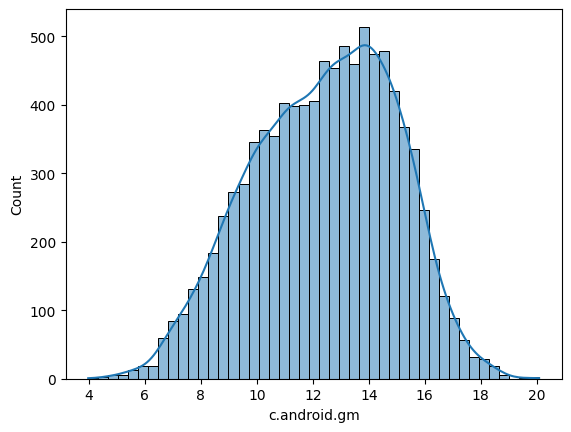

In [288]:
sns.histplot(data=c_android_mwra_1, kde=True)

<Axes: ylabel='c.android.gm'>

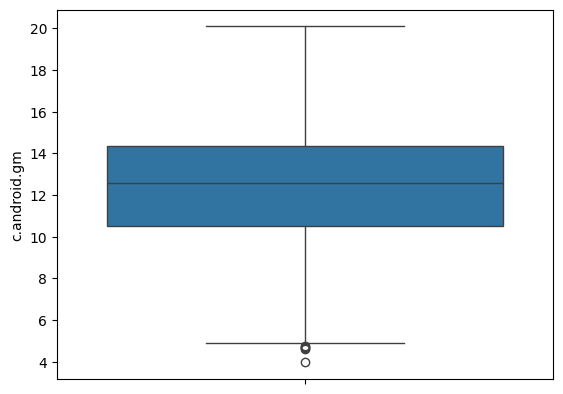

In [289]:
sns.boxplot(data=c_android_mwra_1)

In [290]:
print(len(identify_outliers(c_android_mwra_1))/len(c_android_mwra_1)*100)

c_android_mwra_1 = c_android_mwra_1.drop(identify_outliers(c_android_mwra_1).index)

0.05291565244999471


<Axes: xlabel='c.android.gm', ylabel='Count'>

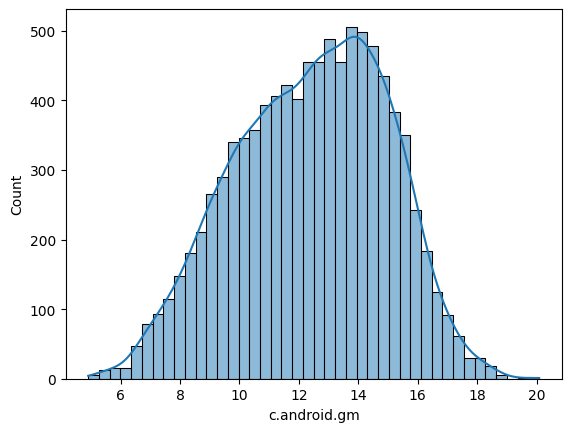

In [291]:
sns.histplot(data=c_android_mwra_1, kde=True)

In [292]:
c_android_mwra_0 = data1.loc[data1['mwra'] == 0, 'c.android.gm']
c_android_mwra_0.info()
c_android_mwra_0.describe()

<class 'pandas.core.series.Series'>
Index: 5619 entries, 1 to 15066
Series name: c.android.gm
Non-Null Count  Dtype  
--------------  -----  
5619 non-null   float64
dtypes: float64(1)
memory usage: 87.8 KB


count    5619.000000
mean       12.379489
std         2.433226
min         4.477260
25%        10.532830
50%        12.561240
75%        14.241755
max        18.876620
Name: c.android.gm, dtype: float64

<Axes: xlabel='c.android.gm', ylabel='Count'>

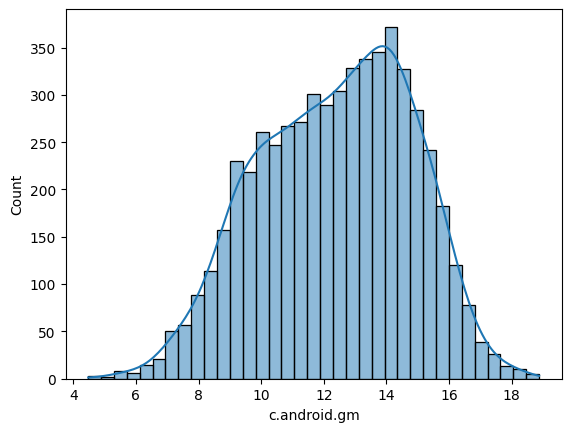

In [293]:
sns.histplot(data=c_android_mwra_0, kde=True)

<Axes: ylabel='c.android.gm'>

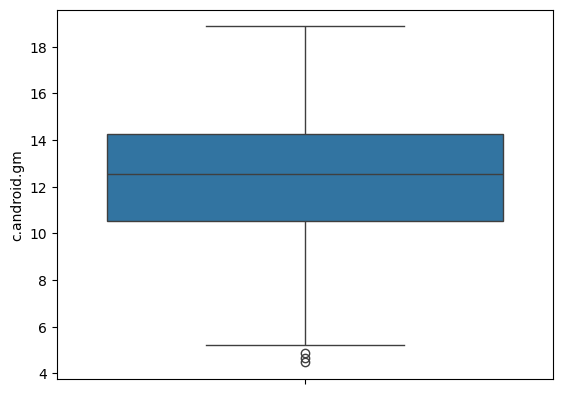

In [294]:
sns.boxplot(data=c_android_mwra_0)

In [295]:
print(len(identify_outliers(c_android_mwra_0))/len(c_android_mwra_0)*100)

c_android_mwra_0 = c_android_mwra_0.drop(identify_outliers(c_android_mwra_0).index)

0.05339028296849973


<Axes: xlabel='c.android.gm', ylabel='Count'>

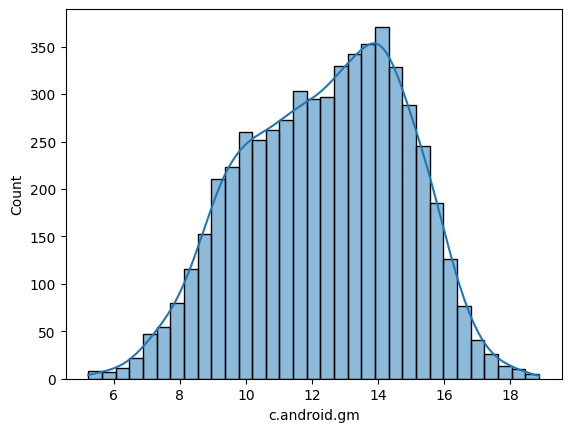

In [296]:
sns.histplot(data=c_android_mwra_0, kde=True)

In [297]:
# we will check for normal distribution of both samples to know if we can use t-test

((array([-3.79644547, -3.57050245, -3.44642149, ...,  3.44642149,
          3.57050245,  3.79644547]),
  array([ 4.91223,  4.95759,  5.01896, ..., 19.54299, 19.90012, 20.08396])),
 (np.float64(2.5368443232697953),
  np.float64(12.408670394959763),
  np.float64(0.9951179083256276)))

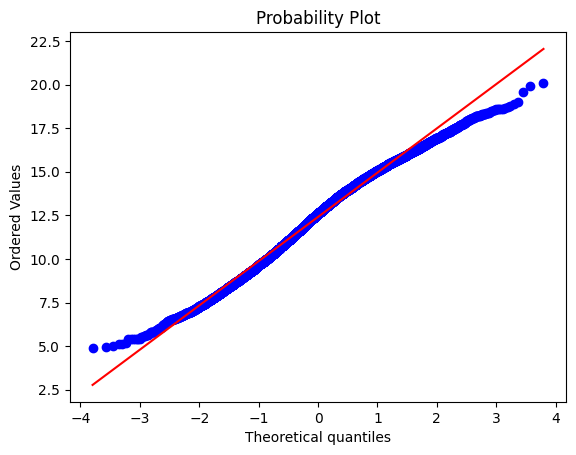

In [298]:
stats.probplot(c_android_mwra_1, dist="norm", plot=plt)

((array([-3.66552463, -3.43200253, -3.30338712, ...,  3.30338712,
          3.43200253,  3.66552463]),
  array([ 5.22424,  5.28674,  5.42047, ..., 18.54366, 18.62849, 18.87662])),
 (np.float64(2.4148954598901518),
  np.float64(12.383605507478633),
  np.float64(0.9943626338739139)))

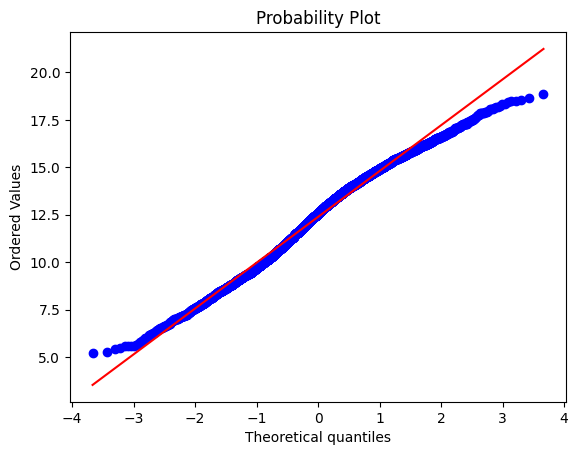

In [299]:
stats.probplot(c_android_mwra_0, dist="norm", plot=plt)

In [300]:
# we will use Kolmogorov-Smirnov Test because our sample size > 2000 to use shapiro
stats.kstest(c_android_mwra_0, 'norm')

KstestResult(statistic=np.float64(0.9999999125640759), pvalue=np.float64(0.0), statistic_location=np.float64(5.22424), statistic_sign=np.int8(-1))

In [301]:
# the test suggests that p_value < 0.05, that means we reject H0 => data is not normally distributed

In [302]:
# we will use Kolmogorov-Smirnov Test because our sample size > 2000 to use shapiro
stats.kstest(c_android_mwra_1, 'norm')

KstestResult(statistic=np.float64(0.9999995497683257), pvalue=np.float64(0.0), statistic_location=np.float64(4.91223), statistic_sign=np.int8(-1))

In [303]:
# Both samples are not normally distributed so we will use non parametric t-test
# Mann-Whitney U test

stats.mannwhitneyu(c_android_mwra_0, c_android_mwra_1)

MannwhitneyuResult(statistic=np.float64(26307057.5), pvalue=np.float64(0.411928821270233))

In [304]:
# the test suggests that p_value > 0.05, that means we cannot reject H0 => c.android.gm from group where 
# mwra is 1 is from the same distribution than c.android.gm from group where mwra is 0

# this mean that the c.android.gm corrolates with mwra atribute

- (B-1b) Overte či Vaše štatistické testy majú dostatok podpory z dát, teda či majú dostatočne silnú štatistickú silu.

# 1st hypothesis

In [305]:
len(c_katana_mwra_1)

9449

In [306]:
len(c_katana_mwra_0)

5545

In [307]:
U_statistic, _ = stats.mannwhitneyu(c_katana_mwra_0, c_katana_mwra_1)
n_mwra_0 = len(c_katana_mwra_0)
n_mwra_1 = len(c_katana_mwra_1)
# Výpočet efektovej veľkosti r
r = U_statistic / (n_mwra_0 * n_mwra_1)
print(f'Efektová veľkosť r: {r:.3f}')

Efektová veľkosť r: 0.165


In [308]:
# r = 0.1: Malý efekt.
# r = 0.3: Stredný efekt.
# r = 0.5: Veľký efekt.

In [309]:
import statsmodels.stats.power as smp
# Použijeme efektovú veľkosť r ako odhad efektu
effect_size = r  # napríklad r z predchádzajúceho výpočtu
sample_size = min(n_mwra_0, n_mwra_1)  # minimum z oboch skupín

# Výpočet štatistickej sily
power_analysis = smp.NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=0.05, alternative='two-sided')
print(f'Štatistická sila: {power:.3f}')

Štatistická sila: 1.000


In [310]:

# We will calculate the Standard devition and mean of both samples
mean_mwra_1 = np.mean(c_katana_mwra_1)
mean_mwra_0 = np.mean(c_katana_mwra_0)

std_mwra_1 = np.std(c_katana_mwra_1, ddof=1)
std_mwra_0 = np.std(c_katana_mwra_0, ddof=1)

# can calculate Cohenov d
cohen_d = (mean_mwra_1 - mean_mwra_0) / np.sqrt((std_mwra_1**2 + std_mwra_0**2) / 2)
print(f'Cohenov d: {cohen_d:.3f}')


Cohenov d: 1.378


In [311]:
# Interpretácia:
# d ≈ 0.2 je malý efekt.
# d ≈ 0.5 je stredný efekt.
# d ≈ 0.8 a viac je veľký efekt.

In [312]:
# kedze cohenov d efekt vysiel vysoky, znamena to ze efekt ze su skupiny od seba rozdielne je velmi znacny
# co dalej podporuje mann whitney test, ze su skupiny z odlisnych distribucii 

# 2nd hypothesis

In [313]:
len(c_android_mwra_0)

5616

In [314]:
len(c_android_mwra_1)

9444

In [315]:
U_statistic, _ = stats.mannwhitneyu(c_android_mwra_0, c_android_mwra_1)
n_mwra_0 = len(c_android_mwra_0)
n_mwra_1 = len(c_android_mwra_1)
# Výpočet efektovej veľkosti r
r = U_statistic / (n_mwra_0 * n_mwra_1)
print(f'Efektová veľkosť r: {r:.3f}')

Efektová veľkosť r: 0.496


In [316]:
# r = 0.1: Malý efekt.
# r = 0.3: Stredný efekt.
# r = 0.5: Veľký efekt.

In [317]:
# Použijeme efektovú veľkosť r ako odhad efektu
effect_size = r  # napríklad r z predchádzajúceho výpočtu
sample_size = min(n_mwra_0, n_mwra_1)  # minimum z oboch skupín

# Výpočet štatistickej sily
power_analysis = smp.NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=0.05, alternative='two-sided')
print(f'Štatistická sila: {power:.3f}')

Štatistická sila: 1.000


In [318]:
# We will calculate the Standard devition and mean of both samples
mean_mwra_1 = np.mean(c_android_mwra_1)
mean_mwra_0 = np.mean(c_android_mwra_0)

std_mwra_1 = np.std(c_android_mwra_1, ddof=1)
std_mwra_0 = np.std(c_android_mwra_0, ddof=1)

# can calculate Cohenov d
cohen_d = (mean_mwra_1 - mean_mwra_0) / np.sqrt((std_mwra_1**2 + std_mwra_0**2) / 2)
print(f'Cohenov d: {cohen_d:.3f}')

Cohenov d: 0.010


In [319]:
# Interpretácia:
# d ≈ 0.2 je malý efekt.
# d ≈ 0.5 je stredný efekt.
# d ≈ 0.8 a viac je veľký efekt.

# kedze cohenov d efekt vysiel maly, znamena to ze efekt ze su skupiny od seba rozdielne je velmi maly
# co dalej podporuje mann whitney test, ze su skupiny z rovnakej distribucie 

# Podiel prace
Filip - 50%
Milan - 50%